#### Task 1 : THE SPARKS FOUNDATION May'21

##### Predict the percentage of an student based on the no. of study hours.

#### Aim --
This is a simple regression task where we have to predict the percentage of a student based on the no. of study hours. also we have to predict the score if a student studies for 9.25 hrs/day

#### Content
1.Data Visualization

2.Data Preparing

3.Splitting Dataset

4.Model Building (linear Regression)

5.Predictions and Model Evaluation

6.Predict the score if a student studies for 9.25 hrs/day



importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset reading

In [7]:
df = pd.read_csv('http://bit.ly/w-data')

In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [132]:
df.shape

(25, 2)

### 1. Data Visualization

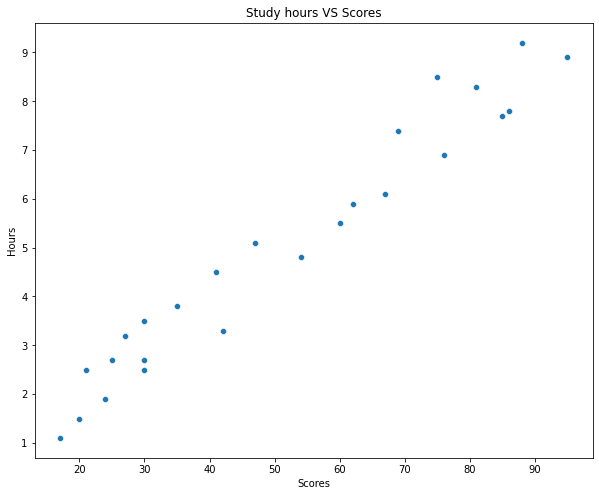

In [16]:
plt.figure(figsize=(10,8))
plt.title('Study hours VS Scores')
sns.scatterplot(x = 'Scores' , y = 'Hours', data =df)
plt.show()

Number of Hours increases Score is also increases so that the relation between Hours and Score(percentage) is Positive

Relationship between Hours and Scores

In [174]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


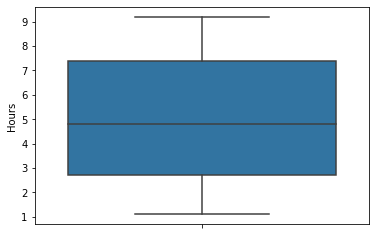

In [173]:
sns.boxplot(data = df , y = df['Hours'])
plt.show()

### 2.Data Preparing

In [62]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### 3.Train Test Split

we will split the dataset into 75% training and 25% testing set.

In [133]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=5)

### 4. Model Building

In [155]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [156]:
model.fit(X_train, y_train)

LinearRegression()

In [157]:
reg = model.coef_*X+model.intercept_

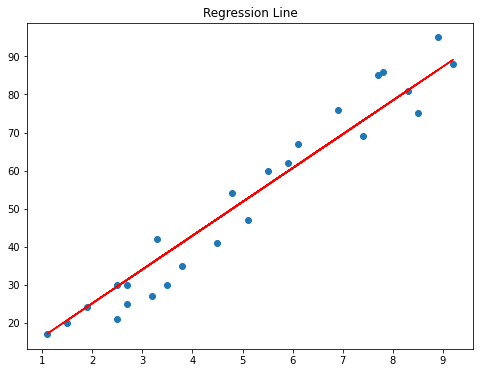

In [158]:
plt.figure(figsize= (8,6))
plt.scatter(X, y)
plt.title('Regression Line')
plt.plot(X, reg, color = 'r');
plt.show()

### 5.Predictions and Model Evaluations

In [159]:
predictions = model.predict(X_test)

In [160]:
predictions[:5]

array([73.10060178, 61.53385008, 35.73109628, 75.76985217, 49.96709838])

In [161]:
y_test[:5]

array([69, 67, 27, 85, 54], dtype=int64)

In [162]:
pred_df = pd.DataFrame({'True_Values': y_test, 'Predicted': predictions})  

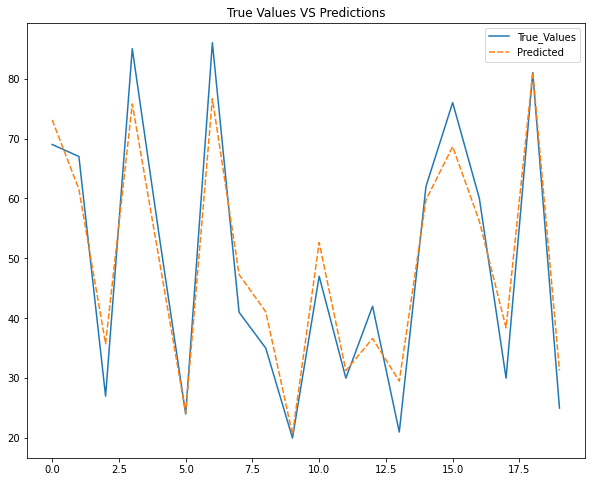

In [163]:
plt.figure(figsize= (10,8))
plt.title('True Values VS Predictions')
sns.lineplot(data = pred_df)
plt.show()

In [164]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [165]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 5.151430860805856
MSE: 35.33653097869369
RMSE: 5.944453799861993


##### Model Accuracy on Testing Dataset

In [166]:
print('Model Accuracy:',model.score(X_test, y_test))

Model Accuracy: 0.9278978739033776


##### 6.Predict the score if a student studies for 9.25 hours/day


In [172]:
def predict(hours):
    pred_score=model.predict(hours)
    return round(pred_score[0],2)
print('Predicted Score is:',predict([[9.25]]))

Predicted Score is: 89.56
